# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão **

Shapes: (117950, 10) (117950, 1) (24927, 10) (24927, 1)
Distribuição y_train:
 1.0    0.5
0.0    0.5
Name: Churn, dtype: float64
Distribuição y_test:
 0.0    0.788
1.0    0.212
Name: Churn, dtype: float64



[Árvore - baseline]
Acurácia: 0.7902 Precisão: 0.5042 Recall: 0.5608 F1: 0.531 AUC: 0.7065

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.86     19649
         1.0       0.50      0.56      0.53      5278

    accuracy                           0.79     24927
   macro avg       0.69      0.71      0.70     24927
weighted avg       0.80      0.79      0.79     24927

Matriz de confusão:
 [[16738  2911]
 [ 2318  2960]]


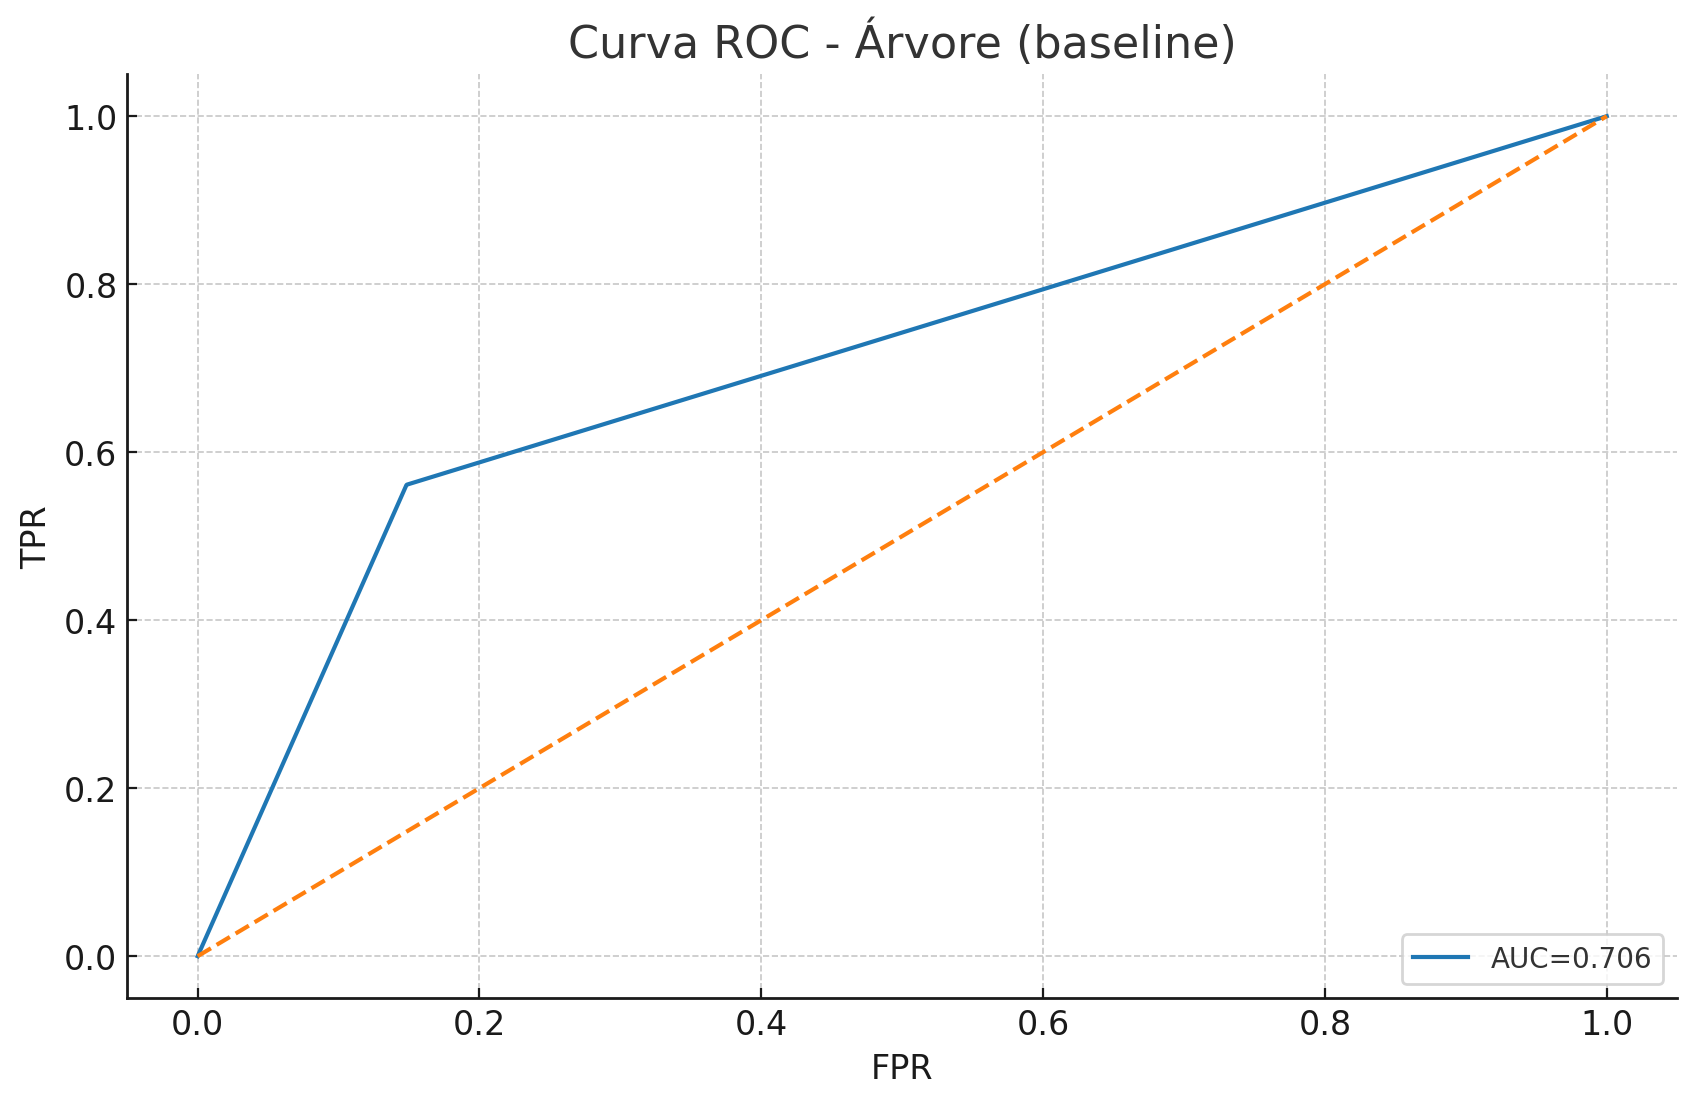

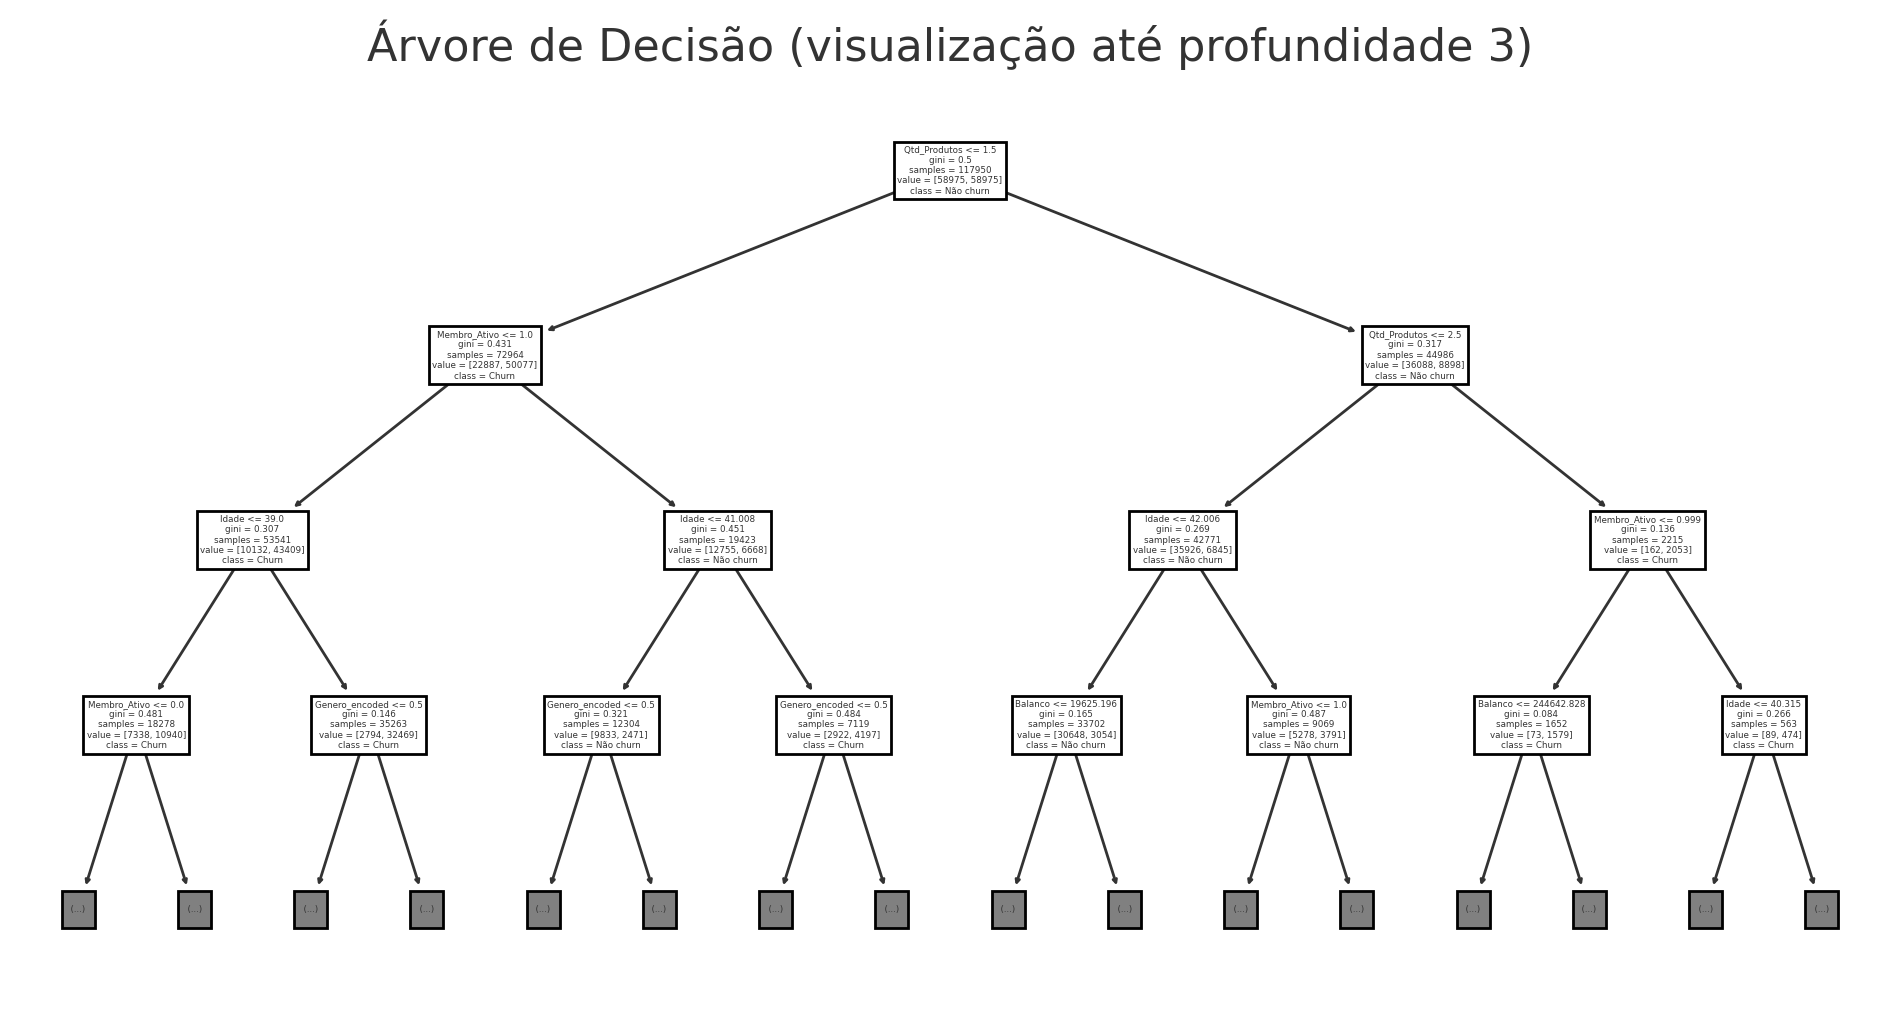

Profundidade da árvore: 39  | Folhas: 13445

Importâncias (top 10):
 Qtd_Produtos      0.267402
Idade             0.194769
Membro_Ativo      0.182049
Credit_Score      0.104782
Balanco           0.080887
Tempo_Credito     0.045274
Salario_Anual     0.042732
Possui_Cartao     0.034210
Genero_encoded    0.031083
Pais_encoded      0.016812
dtype: float64
Top-2 features: ['Qtd_Produtos', 'Idade']

[Árvore - Top2]
Acurácia: 0.8451 Precisão: 0.673 Recall: 0.5225 F1: 0.5883 AUC: 0.8482
Matriz de confusão (Top2):
 [[18309  1340]
 [ 2520  2758]]



[Regressão Logística]
Acurácia: 0.5651 Precisão: 0.2707 Recall: 0.6222 F1: 0.3773 AUC: 0.6014
Matriz de confusão (LogReg):
 [[10802  8847]
 [ 1994  3284]]


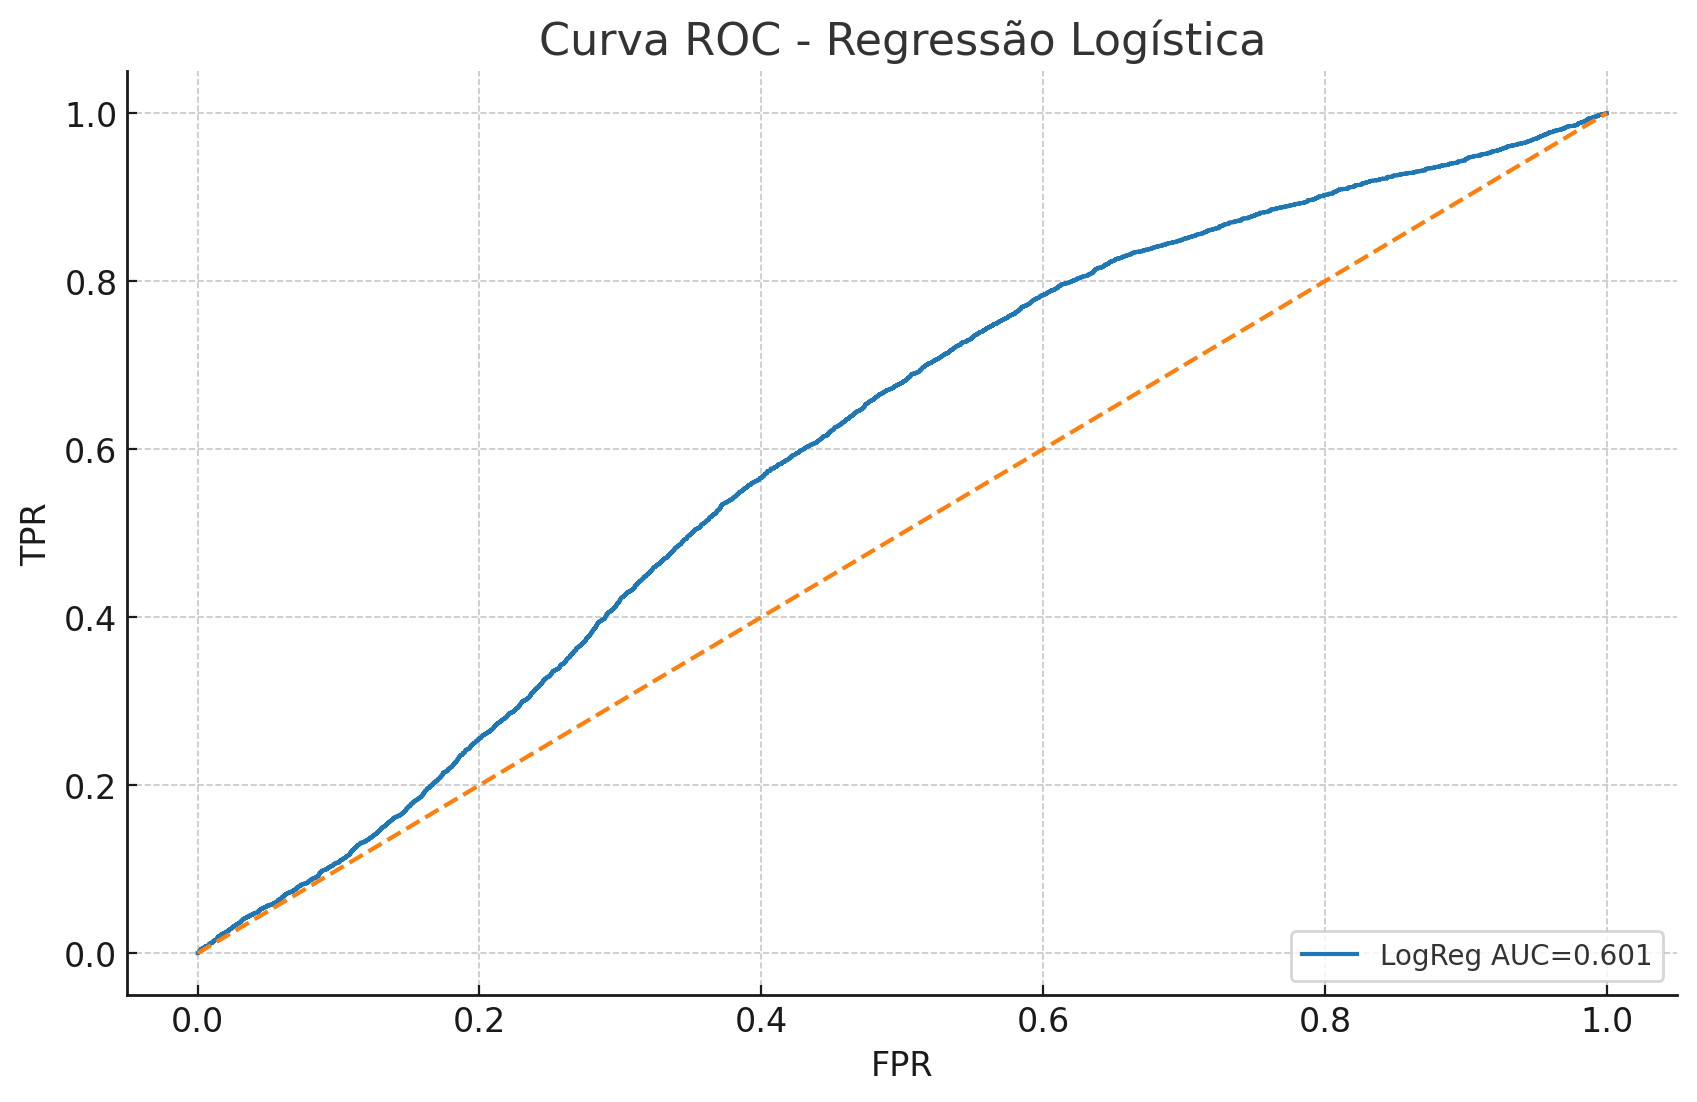

In [1]:

import pandas as pd, numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X_train = pd.read_csv('/mnt/data/X_train_balanced (1).csv')
y_train = pd.read_csv('/mnt/data/y_train_balanced (1).csv')
X_test  = pd.read_csv('/mnt/data/X_test (1).csv')
y_test  = pd.read_csv('/mnt/data/y_test (1).csv')

print("Shapes:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print("Distribuição y_train:\n", y_train['Churn'].value_counts(normalize=True).round(3))
print("Distribuição y_test:\n", y_test['Churn'].value_counts(normalize=True).round(3))

# Modelo baseline (árvore)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train.values.ravel())
y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
auc = roc_auc_score(y_test, y_proba)

print("\n[Árvore - baseline]")
print("Acurácia:", round(acc, 4), "Precisão:", round(prec,4), "Recall:", round(rec,4), "F1:", round(f1,4), "AUC:", round(auc,4))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))

# Curva ROC (figura única, simples)
fpr, tpr, thr = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("Curva ROC - Árvore (baseline)"); plt.legend(loc="lower right")
plt.show()

# Plot da árvore (limitado para não travar)
plt.figure(figsize=(12, 6))
plot_tree(dt, feature_names=X_train.columns, class_names=["Não churn", "Churn"], filled=False, max_depth=3)
plt.title("Árvore de Decisão (visualização até profundidade 3)")
plt.show()
print("Profundidade da árvore:", dt.get_depth(), " | Folhas:", dt.get_n_leaves())

# Importâncias e Top-2
importances = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nImportâncias (top 10):\n", importances.head(10))
top2 = importances.index[:2].tolist()
print("Top-2 features:", top2)

# Modelo com Top-2
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(X_train[top2], y_train.values.ravel())
y_pred2 = dt2.predict(X_test[top2]); y_proba2 = dt2.predict_proba(X_test[top2])[:,1]
acc2 = accuracy_score(y_test, y_pred2)
prec2, rec2, f12, _ = precision_recall_fscore_support(y_test, y_pred2, average='binary', zero_division=0)
auc2 = roc_auc_score(y_test, y_proba2)
print("\n[Árvore - Top2]")
print("Acurácia:", round(acc2, 4), "Precisão:", round(prec2,4), "Recall:", round(rec2,4), "F1:", round(f12,4), "AUC:", round(auc2,4))
print("Matriz de confusão (Top2):\n", confusion_matrix(y_test, y_pred2))

# Regressão Logística para comparação
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train.values.ravel())
y_pred_lr = lr.predict(X_test); y_proba_lr = lr.predict_proba(X_test)[:,1]
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr, rec_lr, f1_lr, _ = precision_recall_fscore_support(y_test, y_pred_lr, average='binary', zero_division=0)
auc_lr = roc_auc_score(y_test, y_proba_lr)
print("\n[Regressão Logística]")
print("Acurácia:", round(acc_lr, 4), "Precisão:", round(prec_lr,4), "Recall:", round(rec_lr,4), "F1:", round(f1_lr,4), "AUC:", round(auc_lr,4))
print("Matriz de confusão (LogReg):\n", confusion_matrix(y_test, y_pred_lr))

# ROC LogReg (figura única)
from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"LogReg AUC={auc_lr:.3f}")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("Curva ROC - Regressão Logística"); plt.legend(loc="lower right")
plt.show()



# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

**Métricas (mesmo conjunto de teste):**  
- **Árvore de Decisão (baseline)** — Acurácia: **0.7902**, Precisão: **0.5042**, Recall: **0.5608**, F1: **0.531**, AUC-ROC: **0.7065**.  
- **Naive Bayes** — Acurácia: **0.5855**, Precisão: **0.2704**, Recall: **0.648**, F1: **0.3816**, AUC-ROC: **0.6053**.  

**Análise:**  
- A **Árvore de Decisão** apresentou **AUC** e **F1** superiores (e também melhor acurácia), indicando melhor separação global e equilíbrio entre precisão e recall.  
- O **Naive Bayes** obteve **recall** alto (bom para detectar churners), porém com **precisão** e **F1** inferiores, aumentando falsos positivos.  
- Em bases tabulares com interações e não linearidades, a árvore tende a capturar melhor os padrões do que as hipóteses de independência do Naive Bayes.

**Conclusão:** Para este problema de churn, a **Árvore de Decisão** se adequou **melhor** aos dados em termos de **AUC** e **F1** (e acurácia), sendo a escolha preferível se o objetivo for desempenho geral. Se a prioridade máxima fosse **não perder churners** (recall acima de tudo), o Naive Bayes poderia ser considerado, ciente do custo de mais falsos positivos.
